# Simulation Recommendation using Efficient Deep Learning

Name: Anthony Kevin Oktavius

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from keras.models import Model
from keras import backend as K
from google.colab import files

In [ ]:
! pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.7.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.3.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.13.1
cac

In [ ]:
print("Please upload your kaggle.json file.")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Please upload your kaggle.json file.


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [ ]:
! cp ./kaggle.json ~/.kaggle/
! kaggle datasets download -d aprabowo/indonesia-tourism-destination
! unzip indonesia-tourism-destination.zip

100% 158k/158k [00:00<00:00, 637kB/s]
100% 158k/158k [00:00<00:00, 636kB/s]
Archive:  indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


Load pretrained model.

In [ ]:
loaded_model = tf.keras.saving.load_model("drive/MyDrive/Models/best_model_efficient_deep_learning")
loaded_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tourism-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 User-Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Tourism-Embedding (Embedding)  (None, 1, 5)         2190        ['Tourism-Input[0][0]']          
                                                                                                  
 User-Embedding_Tourism_input (  (None, 1, 5)        1520        ['User-Input[0][0]']             
 Embedding)                                                                                

In [ ]:
loaded_model.save("saved_model.h5")

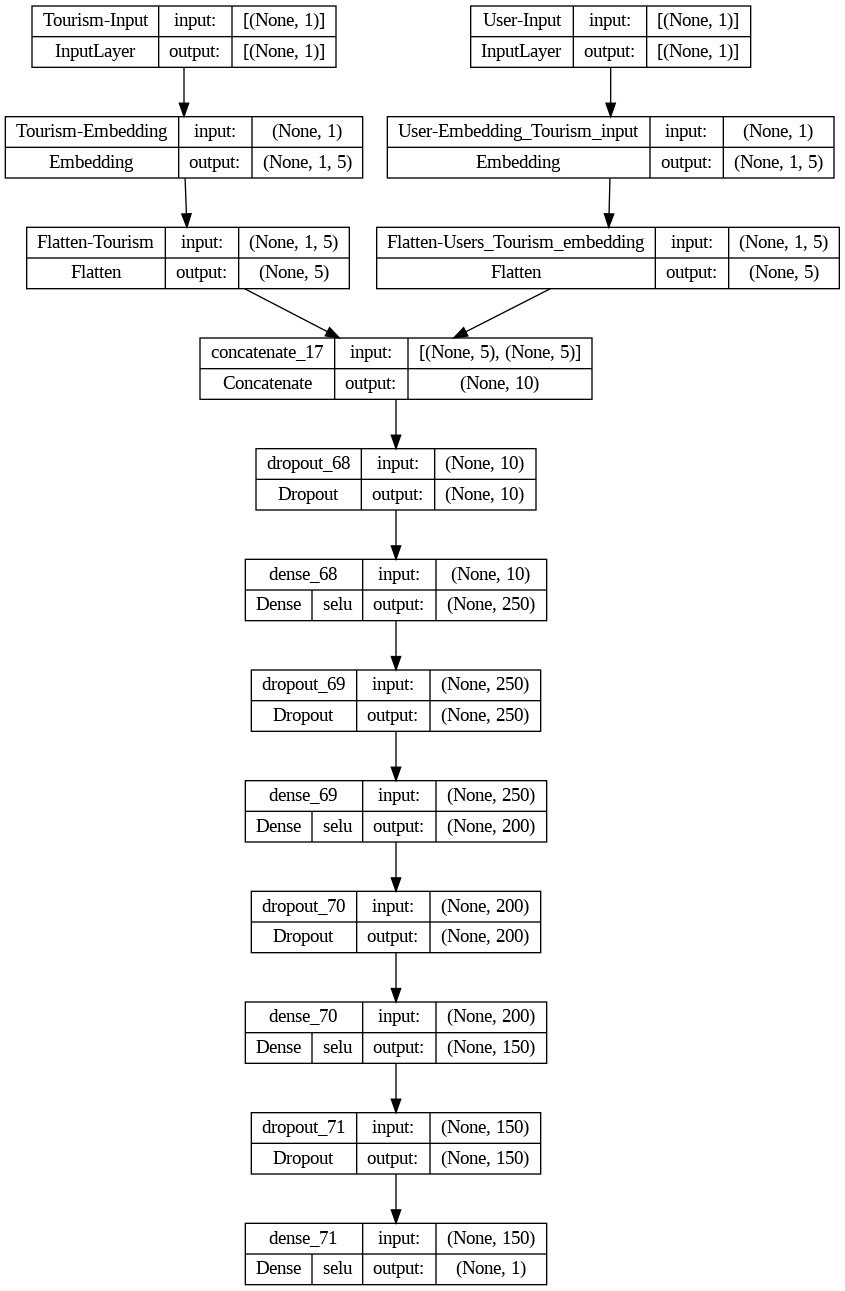

In [ ]:
tf.keras.utils.plot_model(loaded_model, show_shapes=True, show_layer_activations=True)

In [ ]:
tourism_df = pd.read_csv("./tourism_with_id.csv")
rating_df = pd.read_csv("./tourism_rating.csv")

In [ ]:
def make_recommendations(tourism_test_df, original_tourism_df, model):
  # Creating dataset for making recommendations for the first user
  tourism_test_data = np.array(list(tourism_test_df.Place_Id))
  user_test_data = tourism_test_df.User_Id.iloc[0]

  tourism_not_visited_data = original_tourism_df[~original_tourism_df['Place_Id'].isin(tourism_test_data)]['Place_Id']
  tourism_not_visited_data = list(tourism_not_visited_data)
  user_test_data = [user_test_data] * len(tourism_not_visited_data)

  new_user_tourism_data_df = pd.DataFrame(
      {
          "Place_Id": tourism_not_visited_data,
          "User_Id": user_test_data,
      },
  )

  predictions = model.predict([
    new_user_tourism_data_df.User_Id, new_user_tourism_data_df.Place_Id]
  )

  predictions = np.array([a[0] for a in predictions])
  recommended_tourism_ids = (-predictions).argsort()[:10]

  recommended_tourism_df = tourism_df[tourism_df["Place_Id"].isin(recommended_tourism_ids)]

  return recommended_tourism_df

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(rating_df, test_size=0.1, random_state=42)
print(set(test_df.User_Id))

{1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 2

## Pre-defined Scenario 1

In [ ]:
sample_id = 1
sample_user_data_df = test_df[test_df["User_Id"] == sample_id]
sample_user_data_df

,User_Id,Place_Id,Place_Ratings
29,1,328,2
14,1,41,5
3,1,373,3
0,1,179,3
8,1,154,2
23,1,265,5


In [ ]:
visualized_rating_df = sample_user_data_df.merge(
    tourism_df,
    left_on = "Place_Id",
    right_on = "Place_Id",
)

visualized_rating_df

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,328,2,Gua Pawon,Gua Pawon adalah sebuah gua alami dan situs pu...,Cagar Alam,Bandung,10000,4.5,90.0,"{'lat': -6.8231833, 'lng': 107.4371655}",-6.823183,107.437166,NaN,328
1,1,41,5,Museum Bahari Jakarta,Museum Bahari adalah museum yang menyimpan kol...,Budaya,Jakarta,2000,4.4,120.0,"{'lat': -6.1269553, 'lng': 106.8085899}",-6.126955,106.808590,NaN,41
2,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602,NaN,373
3,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
4,1,154,2,Pantai Ngrawe (Mesra),Kabupaten Gunungkidul jadi salah satu wilayah ...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.1333389, 'lng': 110.5537405}",-8.133339,110.553741,NaN,154
5,1,265,5,Museum Mandala Wangsit Siliwangi,Museum Wangsit Mandala Siliwangi adalah museum...,Budaya,Bandung,0,4.4,60.0,"{'lat': -6.9173405, 'lng': 107.6112627}",-6.917340,107.611263,NaN,265


In [ ]:
make_recommendations(sample_user_data_df, tourism_df, loaded_model)

14/14 [==============================] - 3s 3ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
69,70,Perpustakaan Nasional,Perpustakaan Nasional adalah perpustakaan yang...,Budaya,Jakarta,0,4.7,240.0,"{'lat': -6.181291799999999, 'lng': 106.8268717}",-6.181292,106.826872,NaN,70
89,90,Kampung Wisata Taman Sari,Taman Sari Yogyakarta atau Taman Sari Keraton ...,Taman Hiburan,Yogyakarta,5000,4.6,NaN,"{'lat': -7.8100673, 'lng': 110.3594581}",-7.810067,110.359458,NaN,90
119,120,Bukit Panguk Kediwung,Bukit Panguk Kediwung adalah salah satu obyek ...,Budaya,Yogyakarta,250000,4.5,90.0,"{'lat': -7.9583695, 'lng': 110.4407622}",-7.958369,110.440762,NaN,120
153,154,Pantai Ngrawe (Mesra),Kabupaten Gunungkidul jadi salah satu wilayah ...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.1333389, 'lng': 110.5537405}",-8.133339,110.553741,NaN,154
184,185,Pantai Krakal,Pantai krakal merupakan pantai strategis untuk...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.145019, 'lng': 110.5998857}",-8.145019,110.599886,NaN,185
241,242,Curug Dago,Curug Dago Kota Bandung Jawa Barat berada di k...,Cagar Alam,Bandung,12000,4.0,NaN,"{'lat': -6.865522499999999, 'lng': 107.6181878}",-6.865522,107.618188,NaN,242
330,331,Kyotoku Floating Market,"Kyotoku Floating Market Bandung, sebuah wisata...",Budaya,Bandung,175000,4.5,150.0,"{'lat': -6.819874999999999, 'lng': 107.618707}",-6.819875,107.618707,NaN,331
393,394,Air Mancur Menari,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45.0,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,NaN,394
423,424,Pantai Ria Kenjeran,Obyek wisata Pantai Ria Kenjeran Surabaya meru...,Bahari,Surabaya,15000,4.2,45.0,"{'lat': -7.250916399999999, 'lng': 112.8009332}",-7.250916,112.800933,NaN,424
428,429,House of Sampoerna,House of Sampoerna adalah sebuah museum tembak...,Budaya,Surabaya,0,4.6,30.0,"{'lat': -7.230817300000001, 'lng': 112.7342344}",-7.230817,112.734234,NaN,429


In [ ]:
make_recommendations(sample_user_data_df, tourism_df, loaded_model).to_csv("Sample_1.csv", sep = ";")

14/14 [==============================] - 0s 2ms/step


## Pre-defined Scenario 2

In [ ]:
sample_id = 10
sample_user_data_df = test_df[test_df["User_Id"] == sample_id]
sample_user_data_df

,User_Id,Place_Id,Place_Ratings
290,10,67,5
265,10,36,4
286,10,339,3
291,10,35,4
267,10,12,2
274,10,42,3


In [ ]:
visualized_rating_df = sample_user_data_df.merge(
    tourism_df,
    left_on = "Place_Id",
    right_on = "Place_Id",
)

visualized_rating_df

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,10,67,5,Margasatwa Muara Angke,Suaka margasatwa Muara Angke adalah sebuah kaw...,Cagar Alam,Jakarta,25000,4.2,15.0,"{'lat': -6.1160075, 'lng': 106.7692016}",-6.116008,106.769202,NaN,67
1,10,36,4,Skyrink - Mall Taman Anggrek,Salah satu arena ice skating Jakarta adalah Ic...,Taman Hiburan,Jakarta,110000,4.5,180.0,"{'lat': -6.178996, 'lng': 106.791941}",-6.178996,106.791941,NaN,36
2,10,339,3,Sam Poo Kong Temple,"Sam Poo Kong (Hanzi: ; Pinyin: Sānbǎo Dòng), j...",Budaya,Semarang,35000,4.5,NaN,"{'lat': -6.996236599999999, 'lng': 110.398122}",-6.996237,110.398122,NaN,339
3,10,35,4,Grand Indonesia Mall,Grand Indonesia merupakan mal di Jakarta. Mal ...,Pusat Perbelanjaan,Jakarta,0,4.7,120.0,"{'lat': -6.195180099999999, 'lng': 106.8204412}",-6.195180,106.820441,NaN,35
4,10,12,2,Pulau Pari,Pulau Pari adalah sebuah pulau yang terletak d...,Bahari,Jakarta,150000,4.0,NaN,"{'lat': -5.9074328, 'lng': 106.5863989}",-5.907433,106.586399,NaN,12
5,10,42,3,Museum Seni Rupa dan Kramik,Museum Seni Rupa dan Keramik (Indonesia: Museu...,Budaya,Jakarta,5000,4.4,NaN,"{'lat': -6.1342598, 'lng': 106.814552}",-6.134260,106.814552,NaN,42


In [ ]:
make_recommendations(sample_user_data_df, tourism_df, loaded_model)

14/14 [==============================] - 0s 2ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
65,66,Museum Layang-layang,Museum Layang-Layang adalah sebuah museum yang...,Budaya,Jakarta,10000,4.5,90.0,"{'lat': -6.3080282, 'lng': 106.790548}",-6.308028,106.790548,NaN,66
73,74,Museum Tengah Kebun,Museum di Tengah Kebun adalah sebuah museum pe...,Budaya,Jakarta,0,4.6,120.0,"{'lat': -6.267513, 'lng': 106.824107}",-6.267513,106.824107,NaN,74
85,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,NaN,86
115,116,Jurang Tembelan Kanigoro,Jurang Tembelan Kanigoro berada di Desa Wisata...,Taman Hiburan,Yogyakarta,2500,4.5,45.0,"{'lat': -7.940106500000001, 'lng': 110.4300062}",-7.940106,110.430006,NaN,116
150,151,Desa Wisata Kelor,Desa wisata Kelor merupakan salah satu desa ya...,Taman Hiburan,Yogyakarta,0,4.4,90.0,"{'lat': -7.641025800000001, 'lng': 110.3622794}",-7.641026,110.362279,NaN,151
182,183,Jogja Bay Pirates Adventure Waterpark,Jogja Bay Waterpark atau Jogja Bay (bahasa Jaw...,Taman Hiburan,Yogyakarta,150000,4.4,NaN,"{'lat': -7.747846099999999, 'lng': 110.4188754}",-7.747846,110.418875,NaN,183
239,240,Taman Lalu Lintas Ade Irma Suryani Nasution,Taman Lalu-lintas Ade Irma Suryani adalah sebu...,Taman Hiburan,Bandung,7000,4.4,60.0,"{'lat': -6.911211, 'lng': 107.6133389}",-6.911211,107.613339,NaN,240
393,394,Air Mancur Menari,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45.0,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,NaN,394
423,424,Pantai Ria Kenjeran,Obyek wisata Pantai Ria Kenjeran Surabaya meru...,Bahari,Surabaya,15000,4.2,45.0,"{'lat': -7.250916399999999, 'lng': 112.8009332}",-7.250916,112.800933,NaN,424
428,429,House of Sampoerna,House of Sampoerna adalah sebuah museum tembak...,Budaya,Surabaya,0,4.6,30.0,"{'lat': -7.230817300000001, 'lng': 112.7342344}",-7.230817,112.734234,NaN,429


In [ ]:
make_recommendations(sample_user_data_df, tourism_df, loaded_model).to_csv("Sample_2.csv", sep = ";")

14/14 [==============================] - 0s 2ms/step


## Pre Scenario 3

In [ ]:
sample_id = 33
sample_user_data_df = test_df[test_df["User_Id"] == sample_id]
sample_user_data_df

,User_Id,Place_Id,Place_Ratings
1056,33,265,4
1068,33,296,2
1071,33,304,3


In [ ]:
visualized_rating_df = sample_user_data_df.merge(
    tourism_df,
    left_on = "Place_Id",
    right_on = "Place_Id",
)

visualized_rating_df

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,33,265,4,Museum Mandala Wangsit Siliwangi,Museum Wangsit Mandala Siliwangi adalah museum...,Budaya,Bandung,0,4.4,60.0,"{'lat': -6.9173405, 'lng': 107.6112627}",-6.917340,107.611263,NaN,265
1,33,296,2,Batununggal Indah Club,Kolam renang Batununggal merupakan salah satu ...,Taman Hiburan,Bandung,70000,4.4,NaN,"{'lat': -6.963229999999999, 'lng': 107.626416}",-6.963230,107.626416,NaN,296
2,33,304,3,Situ Cileunca,"Situ Cileunca yang berlokasi di Warnasari, Pan...",Cagar Alam,Bandung,2500,4.4,NaN,"{'lat': -7.192328099999997, 'lng': 107.5510012}",-7.192328,107.551001,NaN,304


In [ ]:
make_recommendations(sample_user_data_df, tourism_df, loaded_model).to_csv("Sample_3.csv", sep = ";")

14/14 [==============================] - 0s 2ms/step


In [ ]:
make_recommendations(sample_user_data_df, tourism_df, loaded_model)

14/14 [==============================] - 0s 2ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
70,71,Cibubur Garden Diary (Cibugary),Cibubur Garden Dairy atau biasa dikenal degan ...,Cagar Alam,Jakarta,50000,4.5,NaN,"{'lat': -6.379996900000001, 'lng': 106.8949793}",-6.379997,106.894979,NaN,71
78,79,Taman Spathodea,Objek Wisata Taman Spathodea di Jagakarsa DKI ...,Taman Hiburan,Jakarta,0,4.6,30.0,"{'lat': -6.3226133, 'lng': 106.8241871}",-6.322613,106.824187,NaN,79
90,91,Situs Warungboto,Situs Warungboto atau Pesanggrahan Rejawinangu...,Taman Hiburan,Yogyakarta,0,4.4,60.0,"{'lat': -7.8102685, 'lng': 110.3931513}",-7.810269,110.393151,NaN,91
120,121,Candi Prambanan,Candi Prambanan atau Candi Roro Jonggrang (bah...,Budaya,Yogyakarta,50000,4.7,NaN,"{'lat': -7.752020600000001, 'lng': 110.4914674}",-7.752021,110.491467,NaN,121
155,156,Pantai Pulang Sawal,Pantai Pulang Sawal yang ada di Kecamatan Tepu...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.1506589, 'lng': 110.6126311}",-8.150659,110.612631,NaN,156
187,188,Pantai Sadranan,Pantai Sadranan Jogja adalah butiran intan per...,Bahari,Yogyakarta,10000,4.6,NaN,"{'lat': -8.145667999999997, 'lng': 110.6043914}",-8.145668,110.604391,NaN,188
244,245,Jendela Alam,Tidak hanya menikmati alam sekitar yang masih ...,Taman Hiburan,Bandung,20000,4.4,150.0,"{'lat': -6.819604, 'lng': 107.5964519}",-6.819604,107.596452,NaN,245
396,397,Taman Kunang-Kunang,Taman Kunang – Kunang di Surabaya ini mempunya...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.318220199999999, 'lng': 112.7842405}",-7.318220,112.784240,NaN,397
426,427,Patung Buddha Empat Rupa,"Terletak di sudut Pantai Ria Kenjeran, Patung ...",Budaya,Surabaya,0,4.3,NaN,"{'lat': -7.2472841, 'lng': 112.8010814}",-7.247284,112.801081,NaN,427
431,432,Taman Mundu,Taman Mundu merupakan salah satu taman atau ru...,Taman Hiburan,Surabaya,0,4.4,30.0,"{'lat': -7.251604599999999, 'lng': 112.7545983}",-7.251605,112.754598,NaN,432


## Scenario 1

In [ ]:
scenario_1_df = pd.read_csv("drive/MyDrive/Dataset/tourism_rating_test_case_1.csv", delimiter = ';')
scenario_1_df

,User_Id,Place_Id
0,301.0,1.0
1,301.0,4.0
2,301.0,76.0
3,301.0,40.0
4,301.0,49.0
5,301.0,10.0
6,301.0,13.0
7,NaN,NaN
8,NaN,NaN


In [ ]:
tourism_viz_df = tourism_df.copy()
tourism_viz_df["Place_Id"] = tourism_df["Place_Id"].astype(int)

visualized_rating_df = scenario_1_df.merge(
    tourism_viz_df,
    left_on = "Place_Id",
    right_on = "Place_Id",
)

visualized_rating_df

,User_Id,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,301.0,1.0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,301.0,4.0,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
2,301.0,76.0,Taman Cattleya,Kehadiran Taman Cattleya tentu saja sangat ber...,Taman Hiburan,Jakarta,20000,4.5,NaN,"{'lat': -6.181084299999999, 'lng': 106.7954476}",-6.181084,106.795448,NaN,76
3,301.0,40.0,Galeri Nasional Indonesia,Galeri Nasional Indonesia (bahasa Inggris: Nat...,Budaya,Jakarta,0,4.6,NaN,"{'lat': -6.178548200000001, 'lng': 106.8327716}",-6.178548,106.832772,NaN,40
4,301.0,49.0,Galeri Indonesia Kaya,Galeri Indonesia Kaya (disingkat GIK) adalah r...,Budaya,Jakarta,0,4.8,90.0,"{'lat': -6.1948499, 'lng': 106.8200607}",-6.194850,106.820061,NaN,49
5,301.0,10.0,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5,NaN,"{'lat': -5.803205300000001, 'lng': 106.5237907}",-5.803205,106.523791,NaN,10
6,301.0,13.0,Pulau Pramuka,Pulau Pramuka merupakan salah satu pulau yang ...,Bahari,Jakarta,5000,4.2,NaN,"{'lat': -5.745962, 'lng': 106.6136577}",-5.745962,106.613658,NaN,13


In [ ]:
make_recommendations(scenario_1_df, tourism_df, loaded_model)

14/14 [==============================] - 0s 2ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
64,65,Museum Basoeki Abdullah,Museum Basoeki Abdullah berisi lukisan dan kol...,Budaya,Jakarta,1000,4.6,90.0,"{'lat': -6.289788499999998, 'lng': 106.7932681}",-6.289789,106.793268,NaN,65
71,72,Waterboom PIK (Pantai Indah Kapuk),Waterbom Jakarta merupakan sebuah wahana perma...,Taman Hiburan,Jakarta,300000,4.4,NaN,"{'lat': -6.113655899999999, 'lng': 106.7478596}",-6.113656,106.747860,NaN,72
83,84,Kawasan Kuliner BSM,"Tidak seperti Pecenongan, Kawasan Kuliner BSM ...",Pusat Perbelanjaan,Jakarta,0,4.6,NaN,"{'lat': -6.184258799999999, 'lng': 106.824033}",-6.184259,106.824033,NaN,84
113,114,The Lost World Castle,The Lost World Castle merupakan salah satu obj...,Taman Hiburan,Yogyakarta,30000,4.3,NaN,"{'lat': -7.6041648, 'lng': 110.4510042}",-7.604165,110.451004,NaN,114
148,149,Goa Cerme,"Gua Cerme (bahasa Jawa: ꦒꦸꦮ​ꦕꦺꦂꦩꦺ, translit. G...",Cagar Alam,Yogyakarta,3000,4.4,90.0,"{'lat': -7.979441299999999, 'lng': 110.3803114}",-7.979441,110.380311,NaN,149
180,181,Pantai Sundak,Pantai Sundak merupakan salah satu pantai inda...,Bahari,Yogyakarta,5000,4.5,NaN,"{'lat': -8.147072, 'lng': 110.6079043}",-8.147072,110.607904,NaN,181
237,238,Gunung Manglayang,Gunung Manglayang adalah sebuah gunung bertipe...,Cagar Alam,Bandung,7500,4.5,NaN,"{'lat': -6.876111099999999, 'lng': 107.7436111}",-6.876111,107.743611,NaN,238
392,393,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,60.0,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560,NaN,393
422,423,Patung Sura dan Buaya,Patung Sura dan Baya (Jawa: Patung Suro lan Bo...,Budaya,Surabaya,0,4.6,30.0,"{'lat': -7.296049199999999, 'lng': 112.7387012}",-7.296049,112.738701,NaN,423
427,428,Monumen Bambu Runcing Surabaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Budaya,Surabaya,0,4.6,15.0,"{'lat': -7.267775500000001, 'lng': 112.7443898}",-7.267775,112.744390,NaN,428


In [ ]:
make_recommendations(scenario_1_df, tourism_df, loaded_model).to_csv("Sample_new_1.csv", sep = ";")

14/14 [==============================] - 0s 2ms/step


## Scenario 2

In [ ]:
scenario_2_df = pd.read_csv("drive/MyDrive/Dataset/tourism_rating_test_case_2.csv", delimiter = ';')
scenario_2_df

,User_Id,Place_Id
0,302,18
1,302,17
2,302,20
3,302,121
4,302,170
5,302,171


In [ ]:
tourism_viz_df = tourism_df.copy()
tourism_viz_df["Place_Id"] = tourism_df["Place_Id"].astype(int)

visualized_rating_df = scenario_2_df.merge(
    tourism_viz_df,
    left_on = "Place_Id",
    right_on = "Place_Id",
)

visualized_rating_df

,User_Id,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,302,18,Museum Bank Indonesia,Museum Bank Indonesia adalah sebuah museum di ...,Budaya,Jakarta,2000,4.7,NaN,"{'lat': -6.137127, 'lng': 106.813005}",-6.137127,106.813005,NaN,18
1,302,17,Museum Fatahillah,Museum Fatahillah memiliki nama resmi Museum S...,Budaya,Jakarta,5000,4.4,NaN,"{'lat': -6.136448899999999, 'lng': 106.8130661}",-6.136449,106.813066,NaN,17
2,302,20,Museum Taman Prasasti,Museum Taman Prasasti adalah sebuah museum cag...,Budaya,Jakarta,2000,4.5,90.0,"{'lat': -6.172224099999998, 'lng': 106.8189695}",-6.172224,106.818969,NaN,20
3,302,121,Candi Prambanan,Candi Prambanan atau Candi Roro Jonggrang (bah...,Budaya,Yogyakarta,50000,4.7,NaN,"{'lat': -7.752020600000001, 'lng': 110.4914674}",-7.752021,110.491467,NaN,121
4,302,170,Candi Borobudur,"Borobudur (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦧꦫꦧꦸꦝꦸꦂ, transli...",Budaya,Yogyakarta,50000,4.7,120.0,"{'lat': -7.6078738, 'lng': 110.2037513}",-7.607874,110.203751,NaN,170
5,302,171,Candi Ijo,"Candi Ijo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦆꦗꦺꦴ, translit. ...",Budaya,Yogyakarta,5000,4.6,60.0,"{'lat': -7.783827600000001, 'lng': 110.5118987}",-7.783828,110.511899,NaN,171


In [ ]:
make_recommendations(scenario_2_df, tourism_df, loaded_model)

14/14 [==============================] - 0s 2ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
67,68,Pasar Petak Sembilan,"Pecinan Glodok, tepatnya di Pasar Petak Sembil...",Pusat Perbelanjaan,Jakarta,0,4.4,45.0,"{'lat': -6.143672200000001, 'lng': 106.8129398}",-6.143672,106.812940,NaN,68
75,76,Taman Cattleya,Kehadiran Taman Cattleya tentu saja sangat ber...,Taman Hiburan,Jakarta,20000,4.5,NaN,"{'lat': -6.181084299999999, 'lng': 106.7954476}",-6.181084,106.795448,NaN,76
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,NaN,88
116,117,The World Landmarks - Merapi Park Yogyakarta,Merapi Park merupakan salah satu tempat wisata...,Taman Hiburan,Yogyakarta,22000,4.2,90.0,"{'lat': -7.620904599999999, 'lng': 110.4216275}",-7.620905,110.421627,NaN,117
151,152,Pantai Patihan,"Pantai ini terletak di daerah Srigading, Sande...",Bahari,Yogyakarta,5000,4.1,45.0,"{'lat': -7.997777999999999, 'lng': 110.2449113}",-7.997778,110.244911,NaN,152
181,182,Hutan Mangrove Kulon Progo,Di sini ada kawasan wisata Hutan Mangrove Kulo...,Bahari,Yogyakarta,5000,4.1,120.0,"{'lat': -7.8933459, 'lng': 110.0198257}",-7.893346,110.019826,NaN,182
238,239,Lembang Park & Zoo,"Di Lembang Park & Zoo ada 370 ekor satwa, leng...",Cagar Alam,Bandung,50000,4.5,210.0,"{'lat': -6.8059154, 'lng': 107.5919726}",-6.805915,107.591973,NaN,239
393,394,Air Mancur Menari,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,Surabaya,35000,4.4,45.0,"{'lat': -7.2356933, 'lng': 112.7955234}",-7.235693,112.795523,NaN,394
423,424,Pantai Ria Kenjeran,Obyek wisata Pantai Ria Kenjeran Surabaya meru...,Bahari,Surabaya,15000,4.2,45.0,"{'lat': -7.250916399999999, 'lng': 112.8009332}",-7.250916,112.800933,NaN,424
428,429,House of Sampoerna,House of Sampoerna adalah sebuah museum tembak...,Budaya,Surabaya,0,4.6,30.0,"{'lat': -7.230817300000001, 'lng': 112.7342344}",-7.230817,112.734234,NaN,429


In [ ]:
make_recommendations(scenario_2_df, tourism_df, loaded_model).to_csv("Sample_new_2.csv", sep = ";")

14/14 [==============================] - 0s 2ms/step


## Scenario 3

In [ ]:
scenario_3_df = pd.read_csv("drive/MyDrive/Dataset/tourism_rating_test_case_3.csv", delimiter = ';')
scenario_3_df

,User_Id,Place_Id
0,303,56
1,303,81
2,303,84
3,303,174
4,303,402
5,303,342


In [ ]:
tourism_viz_df = tourism_df.copy()
tourism_viz_df["Place_Id"] = tourism_df["Place_Id"].astype(int)

visualized_rating_df = scenario_3_df.merge(
    tourism_viz_df,
    left_on = "Place_Id",
    right_on = "Place_Id",
)

visualized_rating_df

,User_Id,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,303,56,Pantai Ancol,Pantai Ancol merupakan kawasan wisata yang mer...,Bahari,Jakarta,25000,4.4,NaN,"{'lat': -6.1194215, 'lng': 106.8502435}",-6.119421,106.850244,NaN,56
1,303,81,Mall Thamrin City,Thamrin City atau Thamrin City Mall merupakan ...,Pusat Perbelanjaan,Jakarta,0,4.4,60.0,"{'lat': -6.1946096, 'lng': 106.817905}",-6.194610,106.817905,NaN,81
2,303,84,Kawasan Kuliner BSM,"Tidak seperti Pecenongan, Kawasan Kuliner BSM ...",Pusat Perbelanjaan,Jakarta,0,4.6,NaN,"{'lat': -6.184258799999999, 'lng': 106.824033}",-6.184259,106.824033,NaN,84
3,303,174,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,4.5,60.0,"{'lat': -7.798794300000001, 'lng': 110.367443}",-7.798794,110.367443,NaN,174
4,303,402,Food Junction Grand Pakuwon,Food Junction Grand Pakuwon sebetulnya merupak...,Pusat Perbelanjaan,Surabaya,0,4.5,120.0,"{'lat': -7.251022000000003, 'lng': 112.6620053}",-7.251022,112.662005,NaN,402
5,303,342,Taman Kasmaran,Taman Kasmaran terletak di sebelah kiri Pasar ...,Taman Hiburan,Semarang,3000,4.5,90.0,"{'lat': -6.9909404, 'lng': 110.4065932}",-6.990940,110.406593,NaN,342


In [ ]:
make_recommendations(scenario_3_df, tourism_df, loaded_model)

14/14 [==============================] - 0s 2ms/step


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
69,70,Perpustakaan Nasional,Perpustakaan Nasional adalah perpustakaan yang...,Budaya,Jakarta,0,4.7,240.0,"{'lat': -6.181291799999999, 'lng': 106.8268717}",-6.181292,106.826872,NaN,70
77,78,Hutan Kota Srengseng,Selain Taman Hutan Mangrove dan Pantai Indah K...,Taman Hiburan,Jakarta,1000,4.3,NaN,"{'lat': -6.210694499999999, 'lng': 106.7643954}",-6.210694,106.764395,NaN,78
87,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,NaN,88
117,118,Museum Sonobudoyo Unit I,Museum Sonobudoyo adalah museum dan perpustaka...,Budaya,Yogyakarta,5000,4.6,120.0,"{'lat': -7.8024499, 'lng': 110.3639555}",-7.802450,110.363956,NaN,118
152,153,Pantai Kukup,Pantai Kukup adalah salah satu pantai yang mem...,Bahari,Yogyakarta,10000,4.0,NaN,"{'lat': -8.133876299999999, 'lng': 110.5548349}",-8.133876,110.554835,NaN,153
183,184,Pantai Sepanjang,"Siapa sangka, ternyata Yogyakarta pun punya “K...",Bahari,Yogyakarta,10000,4.4,120.0,"{'lat': -8.136665599999999, 'lng': 110.5659962}",-8.136666,110.565996,NaN,184
240,241,Lawangwangi Creative Space,Lawangwangi merupakan sebuah galeri seni denga...,Taman Hiburan,Bandung,0,4.4,120.0,"{'lat': -6.847898000000001, 'lng': 107.6276146}",-6.847898,107.627615,NaN,241
394,395,Taman Prestasi,Taman Prestasi Surabaya merupakan salah satu t...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.2614722, 'lng': 112.7428284}",-7.261472,112.742828,NaN,395
423,424,Pantai Ria Kenjeran,Obyek wisata Pantai Ria Kenjeran Surabaya meru...,Bahari,Surabaya,15000,4.2,45.0,"{'lat': -7.250916399999999, 'lng': 112.8009332}",-7.250916,112.800933,NaN,424
428,429,House of Sampoerna,House of Sampoerna adalah sebuah museum tembak...,Budaya,Surabaya,0,4.6,30.0,"{'lat': -7.230817300000001, 'lng': 112.7342344}",-7.230817,112.734234,NaN,429


In [ ]:
make_recommendations(scenario_3_df, tourism_df, loaded_model).to_csv("Sample_new_3.csv", sep = ";")

14/14 [==============================] - 0s 2ms/step
